## MNIST Dataset for Neural Network

Welcome to this beginner's tutorial on neural networks using the MNIST dataset! This notebook is designed as an introductory guide to understand and implement neural networks for digit recognition. The MNIST dataset, consisting of 28x28 grayscale images of handwritten digits, serves as an ideal starting point due to its simplicity and the extensive community support around it. Throughout this tutorial, we will cover the basics of setting up your environment, preprocessing the data, constructing a simple neural network model, training this model, and evaluating its performance. By the end of this notebook, you'll have a foundational understanding of neural networks and hands-on experience building one with a classic dataset. Let's dive into the exciting world of neural networks!

### Getting Started

We will be setting up the environment. Most neural network projects are implemented using Python. For beginners with no prior knowledge or experience in Python, you might want to check out [this]() where I curated an introduction to Neural Network Basics.

You will also need to install several packages like NumPy, Matplotlib, Keras, and TensorFlow or PyTorch. This can be done in the Anaconda Prompt by using pip or conda to install the packages

In [ ]:
! pip install numpy matplotlib tensorflow

Now that you have successfully installed the packages, you can then go ahead with this tutorial.

### Step 1: Importing all necessary libraries
The next step after installing all libraries is to import them. It is adviseable to restart your kernel before importing just installed libraries.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


**Pandas** is a highly popular library used in Python for data manipulation and analysis. It offers data structures and operations for manipulating numerical tables and time series. You can check the Panda user guide [here](https://pandas.pydata.org/docs/user_guide/index.html) for more information.

**NumPy** stands for Numerical Python and it's a foundational package for numerical computing in Python. It provides support for arrays (including multidimensional arrays). matrices. and a large collection of high-level mathematical fuctions to operate on these structures. Here'a [documentation](https://numpy.org/doc/stable/user/whatisnumpy.html) that will introduce you to NumPy

**Matplotlib** is a plotting library in Python. It's widely used for creating static, interactive, and animated visualizations in Python. `pyplot` is a module in Matplotlub that provides a MATLAB-like interface for making plots and charts. Here'a [documentation](https://matplotlib.org/stable/index.html) that will introduce you to Matplotlib

In [16]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

**MNIST Dataset**: This dataset is a collection of handwritten digits (0 to 9) commonly used for training and testing machine learning models.

`(x_train, y_train), (x_test, y_test)`: This part of the code is using Python's tuple unpacking. The dataset is divided into two sets: training data and testing data.

`x_train` contains the images that the model will use to learn patterns or features.
`y_train` contains the corresponding labels (the actual numbers the images represent) for the training images.
`x_test` is a separate set of images used to evaluate how well the model performs after it has been trained.
`y_test` contains the corresponding labels for the testing images.
`keras.datasets.mnist.load_data()`: This function is from the Keras library and specifically loads the MNIST dataset. It fetches the dataset and divides it into the training and testing sets, then assigns the images and labels to X_train, y_train, X_test, and y_test.

In [19]:
x_train.shape

(60000, 28, 28)

In [21]:
x_test.shape

(10000, 28, 28)

In [22]:
x_train[0].shape

(28, 28)


`x_train[0].shape` refers to the shape of the first image in the training dataset `(x_train)`. In machine learning, especially when dealing with image data, the shape usually represents the dimensions of the data.

For the MNIST dataset, `x_train[0]` is the first image in the training set. Calling .shape on it gives you information about the image's dimensions, typically in the form of (height, width).

In this case, it signifies the shape of the image. For MNIST, the images are grayscale and have a shape of (28, 28), meaning each image is 28 pixels in height and 28 pixels in width.

So, when you call `x_train[0].shape`, you're essentially checking the dimensions of the first image in the MNIST training set, which is a 28x28 grayscale image.

In [24]:
x_test[0].shape

(28, 28)

In [25]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  


`x_train[0]` represents the first image in the training set of the MNIST dataset. This specific entry in `x_train` contains the pixel values of the image.

For the MNIST dataset, `x_train[0]` is a 28x28 array representing a grayscale image. Each element in this array corresponds to the grayscale intensity of a pixel in the image. The values typically range from 0 to 255, where 0 is black and 255 is white.

If you were to print `x_train[0]`, you would see a 28x28 array of numbers, where each number indicates the intensity of the corresponding pixel in the image. This array of pixel values forms the representation of the handwritten digit that the machine learning model will learn from during its training process.

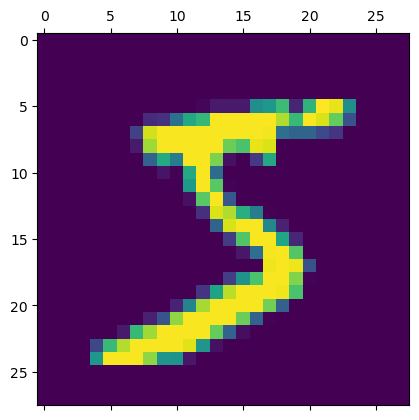

In [26]:
plt.matshow(x_train[0])

The `plt.matshow(x_train[0])` is a command using Matplotlib to visualize the first image in the dataset `x_train` as a matrix.

`matshow()` is a function from the `pyplot` module specifically designed to display a matrix of 2D array as a color-coded image. It's particularly useful for visualizing the MNIST dataset.

`x_train[0]` indexes into the `x_train` array to retrieve the first image. In the MNIST dataset, `x_train` is an array where each element is a 28x28 array representing a grayscale image of a handwritten digit.

In [27]:
y_train[0]

5


`y_train[0]` refers to the label associated with the first image in the training set of the MNIST dataset. In the MNIST dataset, each image `(like x_train[0])` has a corresponding label that identifies the digit represented by that image.

So, `y_train[0]` contains the label for the first image in the training set, specifying the actual digit written in the image represented by `x_train[0]`.

For instance, if `y_train[0]` is 5, it means that the handwritten digit in `x_train[0]` is the number 5. The labels in the MNIST dataset range from 0 to 9, representing the digits from 0 to 9 respectively.

In [28]:
x_train = x_train / 255
x_test = x_test / 255

This code snippet is performing a common preprocessing step called normalization on the pixel values of the images in the MNIST dataset. In this case, it's scaling the pixel values to a range between 0 and 1.

For images represented as pixel values ranging from 0 to 255 (in the case of grayscale images), dividing each pixel value by 255 effectively scales them down to a range between 0 and 1. This normalization process can be beneficial for training machine learning models for several reasons:

1. Faster convergence: Normalizing the input data to a smaller range often helps the optimization algorithm converge faster during training.

2. Stability in training: Normalization helps in preventing potential issues with exploding or vanishing gradients that could occur when using larger pixel value ranges.

The lines `x_train = x_train / 255 and x_test = x_test / 255` are dividing every pixel value in the training and testing sets, respectively, by 255, ensuring all pixel values are between 0 and 1.

This preprocessing step does not alter the relative differences between pixel values but adjusts their scale to a range that is more suitable for many machine learning algorithms.

In [30]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [31]:
x_train_flattened = x_train.reshape(len(x_train), 28 * 28)
x_test_flattened = x_test.reshape(len(x_test), 28 * 28)

This code snippet is reshaping the 28x28 images in the MNIST dataset into flattened arrays of length 784 (28 * 28). It's transforming the 2D array representation of each image into a 1D array while maintaining all the pixel information.

Here's what's happening in these lines:

1. `x_train_flattened = x_train.reshape(len(x_train), 28 * 28)`: This line takes the `x_train` dataset, which contains 2D arrays representing images (28x28 pixels), and reshapes each image into a flattened 1D array with a length of 784 (28*28). The `reshape()` function is used to change the shape of the array, where `len(x_train)` represents the number of images in the training set.

2. `x_test_flattened = x_test.reshape(len(x_test), 28 * 28)`: Similarly, this line does the same for the testing dataset `(x_test)`, flattening each image into a 1D array of length 784.

This transformation from a 2D representation (a matrix) to a 1D representation (a vector) is often done as a preprocessing step before feeding the data into certain types of machine learning models, especially those that expect a flat input format rather than a structured grid (such as fully connected neural networks).

In [32]:
x_train_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
x_test_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
x_train_flattened.shape

(60000, 784)

In [35]:
x_train_flattened[0].shape

(784,)

Now that we are done with data preparing and preprocessing, we can now build our neural network model using Keras.


In [36]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(x_train_flattened, y_train, epochs = 200)

Epoch 1/200
1875/1875 [==============================] - 2s 821us/step - loss: 0.4675 - accuracy: 0.8789
Epoch 2/200
1875/1875 [==============================] - 1s 758us/step - loss: 0.3038 - accuracy: 0.9157
Epoch 3/200
1875/1875 [==============================] - 1s 751us/step - loss: 0.2833 - accuracy: 0.9209
Epoch 4/200
1875/1875 [==============================] - 1s 798us/step - loss: 0.2735 - accuracy: 0.9234
Epoch 5/200
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2656 - accuracy: 0.9259
Epoch 6/200
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2619 - accuracy: 0.9272
Epoch 7/200
1875/1875 [==============================] - 2s 868us/step - loss: 0.2582 - accuracy: 0.9281
Epoch 8/200
1875/1875 [==============================] - 2s 830us/step - loss: 0.2553 - accuracy: 0.9296
Epoch 9/200
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2531 - accuracy: 0.9299
Epoch 10/200
1875/1875 [==============================] - 2s 

This code snippet defines, compiles, and trains a simple neural network using Keras to classify the flattened MNIST images into their respective digit classes. Let's break it down step by step:

1. Model Definition:

* `model = keras.Sequential([...])`: This creates a Sequential model in Keras, a linear stack of layers. In this case, it's a single-layer neural network.
* `keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')`: This line adds a Dense layer to the model. It has 10 neurons (units) representing the output classes (digits 0 to 9). The `input_shape=(784,)` specifies that the input to this layer is a flattened array of length 784 (representing the pixels of the images). The activation function used in this layer is the sigmoid function `(activation='sigmoid')`.
2. Model Compilation:

* `model.compile(...)`: This compiles the model, specifying the optimizer, loss function, and metrics for evaluation.
* `optimizer='adam'`: Adam is an optimization algorithm used to update network weights iteratively based on training data.
* `loss='sparse_categorical_crossentropy'`: This is the loss function used to measure how well the model performs on the training data. It is suitable for integer-encoded labels (like in the MNIST dataset) and calculates the loss between the predicted and true labels.
* `metrics=['accuracy']`: During training, the model will track accuracy as a metric to evaluate its performance.
3. Model Training:

* `model.fit(x_train_flattened, y_train, epochs=200)`: This trains the model using the training data `(x_train_flattened)` and their respective labels `(y_train)` for 200 epochs. The `fit()` function fits the model to the training data, adjusting the model's weights to minimize the specified loss function.
  
Overall, this code creates a simple neural network with one Dense layer, compiles it with appropriate settings for training on the MNIST dataset, and then trains it for 200 epochs using the flattened input images and their corresponding labels. The model will aim to learn how to predict the correct digit labels for the provided images during the training process.

In [37]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 0s 697us/step - loss: 0.3180 - accuracy: 0.9253


[0.31797608733177185, 0.9253000020980835]

The code snippet `model.evaluate(x_test_flattened, y_test)` is used to evaluate the trained model's performance on the testing dataset `(x_test_flattened)` to assess its accuracy and loss. This method computes the specified metrics defined during the model compilation.

* `x_test_flattened`: The flattened test images.
* `y_test`: The corresponding true labels for the test images.
When this line of code is executed after the model has been trained, it will use the trained model to predict the labels for the test images and compare these predictions against the true labels `(y_test)`. It will calculate the specified metrics, in this case, accuracy, as defined during the model compilation.

For instance, if you have defined accuracy as a metric during model compilation `(metrics=['accuracy'])`, this `model.evaluate()` function will output the accuracy of the model on the test dataset. It will display the accuracy achieved by the model in classifying the test images into their respective digit categories based on the predictions made by the trained model.

In [39]:
y_predicted = model.predict(x_test_flattened)

313/313 [==============================] - 0s 596us/step


The line `y_predicted = model.predict(x_test_flattened)` is used to generate predictions using the trained model on the test dataset `(x_test_flattened)`. This line predicts the output labels based on the input test data.

Once this line is executed, `y_predicted` will contain the model's predictions for each test input. Each prediction will likely be an array of probabilities or scores indicating the likelihood or confidence of the input belonging to each class.

If you then access `y_predicted[0]`, it will retrieve the model's prediction for the first test input in the form of an array of probabilities or scores. For the MNIST dataset, since the model was configured with a `'softmax'` activation function in the output layer (commonly used for multi-class classification problems), the values in `y_predicted[0]` represent the probabilities or confidence scores for each class (digits 0 to 9) that the model predicts for the first test input.

For example, if you have ten values like `[0.1, 0.05, 0.03, 0.8, 0.01, 0.02, 0.05, 0.02, 0.03, 0.02]`, it means the model is most confident (highest probability value) that the image corresponds to the digit '3' because the third element has the highest probability (0.8) among all classes.

So, `y_predicted[0]` will provide the model's predicted probabilities or confidence scores for the first test input in the MNIST dataset.

In [41]:
y_predicted[0]

array([5.1382357e-14, 3.4129714e-18, 4.6121921e-12, 6.1559504e-01,
       4.8002694e-06, 2.9649453e-03, 2.4804781e-22, 9.9871385e-01,
       1.8284963e-03, 3.5573307e-02], dtype=float32)

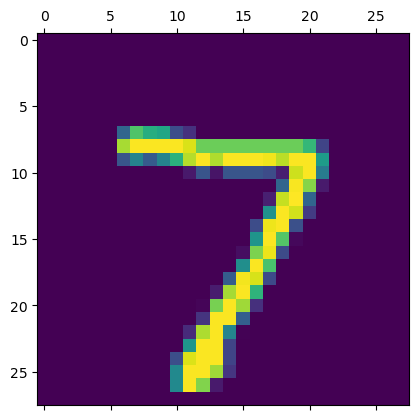

In [42]:
plt.matshow(x_test[0])

From the above output, we can see that the expected digit is 7. To confirm that, we can examine the output of this code, `y_predicted[0]`.

It is evident that position at which the number is highest is the 7th position, hence, 7 as the expected output.

That can be easily implemented using `np.argmax()`

In [43]:
np.argmax(y_predicted[0])

7

`np.argmax(y_predicted[0])` uses NumPy's argmax function to find the index of the maximum value in the array `y_predicted[0]`. This is commonly used when dealing with prediction probabilities or scores generated by a model for classification tasks.

In the context of the MNIST dataset:

`y_predicted[0]` is an array containing the model's predicted probabilities or scores for each class (digits 0 to 9) for the first test input.
`np.argmax()` finds the index of the maximum value in that array, effectively identifying the class with the highest predicted probability or score.
So, `np.argmax(y_predicted[0])` will return the index corresponding to the highest probability in the `y_predicted[0]` array, indicating the model's predicted label for the first test input in the MNIST dataset. This index represents the digit that the model predicts the image to be, based on its training.

In [44]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]


The line of code `y_predicted_labels = [np.argmax(i) for i in y_predicted]` is using a list comprehension to iterate through each prediction array (i) in `y_predicted` and apply `np.argmax()` to find the index of the maximum value in each prediction array. This operation effectively determines the predicted label for each test input in the MNIST dataset.

Breaking it down:

`y_predicted` is a list/array containing predictions made by the model for all the test inputs. Each element (i) in `y_predicted` is an array of probabilities or scores for the classes (digits 0 to 9).
`[np.argmax(i) for i in y_predicted]` iterates through each prediction array (i) in `y_predicted` and applies `np.argmax()` to find the index of the maximum value in each array.
The result is stored in the list `y_predicted_labels`, which contains the predicted labels (digits) for each test input based on the model's predictions.
Ultimately, after executing this line of code, `y_predicted_labels` will hold the predicted labels for each test input, inferred from the model's predictions. These predicted labels represent the digits the model believes each test image corresponds to, based on the highest probability class from its predictions.

In [45]:
y_predicted_labels

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 6,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 6,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 2,
 7,
 4,
 3,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 2,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 1,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 9,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 3,
 0,
 5,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 7,
 9,
 3,
 9,
 0,
 3,
 5,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 7,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 8,
 8,
 7,
 2,
 6,
 0,
 2,
 4,
 2,


In [46]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 950,    0,    3,    3,    1,   11,    6,    3,    3,    0],
       [   0, 1116,    6,    2,    0,    2,    3,    1,    5,    0],
       [   5,   13,  916,   21,   10,    3,   11,    8,   42,    3],
       [   3,    2,   12,  927,    3,   19,    2,   10,   27,    5],
       [   1,    4,    7,    4,  927,    0,    6,    6,    6,   21],
       [   8,    5,    3,   37,   10,  772,   14,    6,   33,    4],
       [   9,    3,   10,    2,    5,   14,  913,    1,    1,    0],
       [   0,   10,   22,    9,    4,    2,    0,  950,    3,   28],
       [   6,   12,    6,   21,    7,   23,   10,   12,  870,    7],
       [   7,    7,    1,    8,   25,    8,    0,   30,   11,  912]])>

The code `tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)` generates a confusion matrix using TensorFlow's `tf.math.confusion_matrix` function. This matrix provides a summary of the model's performance in a classification task by comparing the true labels (y_test) against the predicted labels `(y_predicted_labels)` for the test dataset.

* `labels=y_test`: This parameter expects the true labels of the test dataset (y_test), which are the actual digits corresponding to the test images.
* `predictions=y_predicted_labels`: This parameter takes the predicted labels (y_predicted_labels) generated by the model for the test dataset.
The confusion matrix is a table that shows the counts of true positive, true negative, false positive, and false negative predictions for each class (in this case, digits 0 to 9). It helps to evaluate the performance of a classification model by revealing where the model is making correct or incorrect predictions.

Running `cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)` will compute the confusion matrix based on the provided true labels `(y_test)` and predicted labels `(y_predicted_labels)`. The resulting `cm` variable will hold the confusion matrix as a TensorFlow tensor, showing the classification performance of the model across different digit classes.

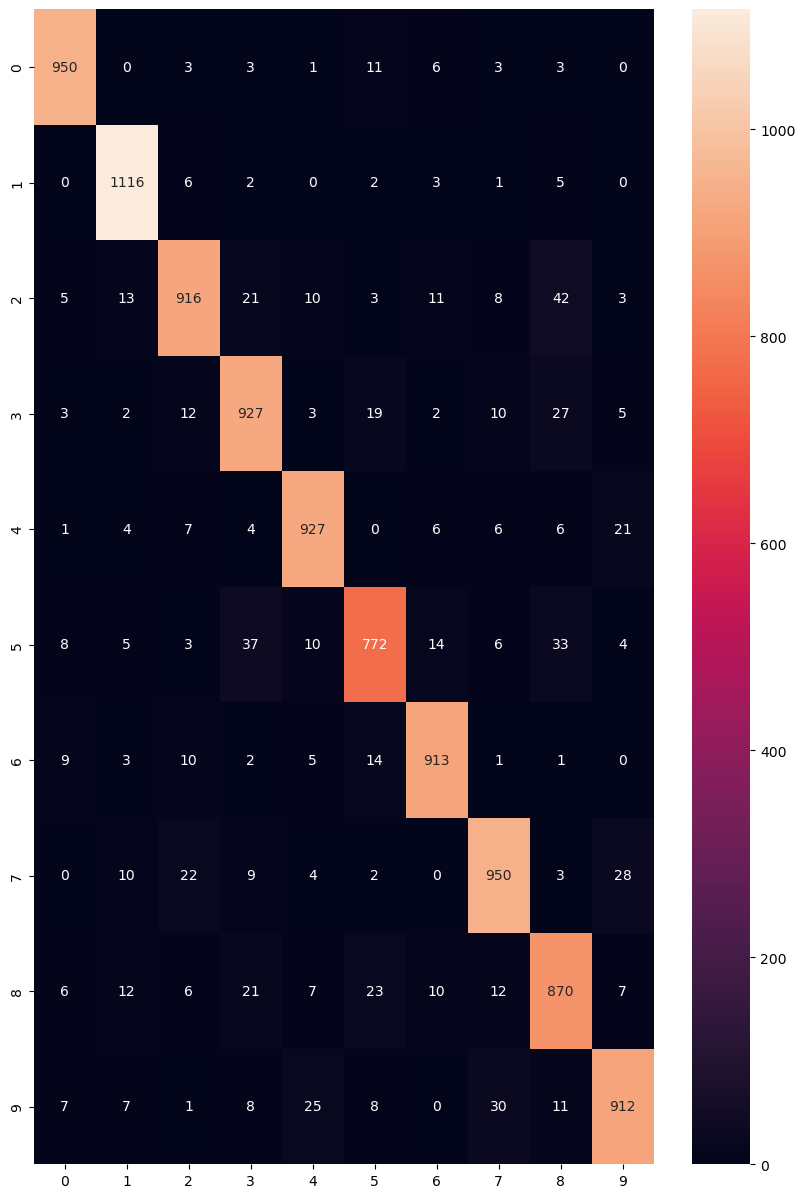

In [47]:
import seaborn as sns
plt.figure(figsize = (10,15))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

**Seaborn** is a statistical data visualization librarybuilt on top of Matplotlib. It offers a higher-level interface for drawing attractive and informative statistical graphics.

The `plt.figure()` command from Matplotlib creates a new figure, or a space where a plot can be drawn.

`figsize=(10,15)` is a parameter that sets the size of the figure in inches. In this case, the width of the figure is 10 inches, and the height is 15 inches.

`sns.heatmap()` is a function in Seaborn that creates a heatmap. A heatmap is a two-dimensional graphical representation of data where individual values contained in a matrix are represented as colors.

`cm` is the confusion matrix to be viusalized. This has already been defined in the previous code block. A confusion matrix is a table used to describe the performance of a classification model. Each entry in the matrix corresponds to the count of predictions for each class.

`annot=True` tells Seaborn to annotate each cell in the heatmap with the numeric value using text.

Let's work with some hidden layers.

In [49]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation = 'relu'),
    keras.layers.Dense(150, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(x_train_flattened, y_train, epochs = 200)

Epoch 1/200
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2328 - accuracy: 0.9321
Epoch 2/200
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0990 - accuracy: 0.9700
Epoch 3/200
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0715 - accuracy: 0.9778
Epoch 4/200
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0544 - accuracy: 0.9822
Epoch 5/200
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0434 - accuracy: 0.9858
Epoch 6/200
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0356 - accuracy: 0.9886
Epoch 7/200
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0274 - accuracy: 0.9905
Epoch 8/200
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0279 - accuracy: 0.9906
Epoch 9/200
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0222 - accuracy: 0.9924
Epoch 10/200
1875/1875 [==============================] - 3s 1ms/step - l

This revised code defines a more complex neural network compared to the previous one. Let's break down the changes:

1. Model Architecture:

* Three Dense Layers: This model has three dense layers.
* `keras.layers.Dense(100, input_shape = (784,), activation = 'relu')`: The first dense layer consists of 100 neurons and uses the ReLU (Rectified Linear Unit) activation function. It introduces non-linearity to the model, allowing it to learn more complex patterns. ReLU is preferred because it helps in mitigating the vanishing gradient problem and speeds up training. The `input_shape = (784,)` specifies that each input sample is a 784-dimensional vector, which corresponds to the flattened 28x28 images from the MNIST dataset.
* `keras.layers.Dense(150, activation = 'relu')`: This second dense layer introduces even more neurons (150), thereby increasing the model's capacity to learn. It also uses the ReLU activation function to introduce more non-linearity.
* `keras.layers.Dense(10, activation='sigmoid')`: The third dense layer has 10 neurons (representing the output classes) and uses the sigmoid activation function. This layer generates the output probabilities for each class using the softmax activation. I decided to change the activation function from sigmoid to softmax. For multi-class classification like MNIST, `softmax` activation is typically used in the output layer because it converts the outputs to probability distribution across the classes.
2. Model Compilation and Training:

The compilation and training settings `(optimizer, loss, metrics, and epochs)` remain the same as before.
This updated model introduces more complexity by adding an additional hidden layer with 100 neurons and ReLU activation. The ReLU activation function is often used in hidden layers to introduce non-linearity and capture more intricate patterns in the data.

The model will undergo training for 200 epochs using the training dataset `(x_train_flattened and y_train)`, aiming to learn the representations of handwritten digits from the MNIST dataset. This complex architecture might potentially improve the model's ability to learn intricate patterns and enhance its classification performance compared to simpler models.

In [50]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 0s 825us/step - loss: 0.5448 - accuracy: 0.9818


[0.5448419451713562, 0.9818000197410583]